In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
from tiny import PointCloudDiffusion
import json
import torch
from tiny.utils import plot_point_clouds

/home/ubuntu/.cache/pypoetry/virtualenvs/tiny-text-to-3d-c32y3Mwx-py3.10/lib/python3.10/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [3]:
dit_config_path = "./configs/diffusion/dit-base.json"
dit_config = json.load(open(dit_config_path))
diffusion = PointCloudDiffusion.from_config(dit_config)

diffusion

05/18/2024 01:37:03 - INFO - root - Loaded ViT-B-32 model config.


05/18/2024 01:37:05 - INFO - root - Loading pretrained ViT-B-32 weights (laion2b_s34b_b79k).


PointCloudDiffusion(
  (noise_scheduler): NoiseScheduler()
  (model): CLIPConditionalPointCloudDiT(
    (x_embed): Linear(in_features=3, out_features=128, bias=True)
    (t_embed): TimestepEmbedding(
      (mlp): Sequential(
        (0): Linear(in_features=512, out_features=128, bias=True)
        (1): SiLU()
        (2): Linear(in_features=128, out_features=128, bias=True)
      )
    )
    (c_embed): Linear(in_features=512, out_features=128, bias=True)
    (dit_blocks): ModuleList(
      (0-23): 24 x DiTBlock(
        (layernorm1): LayerNorm((128,), eps=1e-05, elementwise_affine=True)
        (layernorm2): LayerNorm((128,), eps=1e-05, elementwise_affine=True)
        (adaLN_modulation): Sequential(
          (0): SiLU()
          (1): Linear(in_features=128, out_features=768, bias=True)
        )
        (mlp): MLP(
          (mlp): Sequential(
            (0): Linear(in_features=128, out_features=512, bias=True)
            (1): GELU(approximate='tanh')
            (2): Dropout(p=0,

In [4]:
checkpoint = torch.load("./checkpoints/walrus-modelnet40/checkpoint-48000/checkpoint.pt")
weights = checkpoint["weights"]
weights

OrderedDict([('null_token',
              tensor([[ 2.9958e-02, -1.7760e-02, -3.9168e-02, -9.5818e-02, -7.1999e-02,
                       -9.8664e-02,  3.2363e-02, -1.8200e-02, -2.9009e-02,  8.2220e-02,
                       -1.0437e-01, -1.2919e-02,  6.7826e-03,  1.8901e-02, -1.2774e-01,
                       -3.4113e-02, -1.0518e-01, -3.3634e-02, -8.4127e-02, -1.0693e-01,
                        1.0119e-01,  1.4551e-01, -1.0855e-01, -3.8598e-03,  3.3176e-02,
                        7.6611e-02,  8.5104e-02,  6.7742e-02,  1.2604e-01,  2.8632e-02,
                        4.9611e-03,  1.7897e-02, -1.5838e-01, -4.0766e-02,  3.5830e-02,
                       -3.6889e-02, -9.4252e-02,  1.0564e-01,  1.3284e-02, -1.0144e-01,
                        8.3055e-02, -1.5585e-01, -4.0401e-02,  1.2071e-02,  6.8696e-02,
                        1.0397e-01, -4.2685e-02, -1.1226e-01,  1.2329e-01,  7.9663e-03,
                       -9.5726e-03, -9.5896e-02,  4.6304e-02, -3.4097e-02,  1.2517e-01,
    

In [5]:
diffusion.model.load_state_dict(weights)

<All keys matched successfully>

In [6]:
diffusion.to("cuda")

PointCloudDiffusion(
  (noise_scheduler): NoiseScheduler()
  (model): CLIPConditionalPointCloudDiT(
    (x_embed): Linear(in_features=3, out_features=128, bias=True)
    (t_embed): TimestepEmbedding(
      (mlp): Sequential(
        (0): Linear(in_features=512, out_features=128, bias=True)
        (1): SiLU()
        (2): Linear(in_features=128, out_features=128, bias=True)
      )
    )
    (c_embed): Linear(in_features=512, out_features=128, bias=True)
    (dit_blocks): ModuleList(
      (0-23): 24 x DiTBlock(
        (layernorm1): LayerNorm((128,), eps=1e-05, elementwise_affine=True)
        (layernorm2): LayerNorm((128,), eps=1e-05, elementwise_affine=True)
        (adaLN_modulation): Sequential(
          (0): SiLU()
          (1): Linear(in_features=128, out_features=768, bias=True)
        )
        (mlp): MLP(
          (mlp): Sequential(
            (0): Linear(in_features=128, out_features=512, bias=True)
            (1): GELU(approximate='tanh')
            (2): Dropout(p=0,

  5%|▌         | 1/20 [00:00<00:02,  8.24it/s]

100%|██████████| 20/20 [00:02<00:00,  7.67it/s]


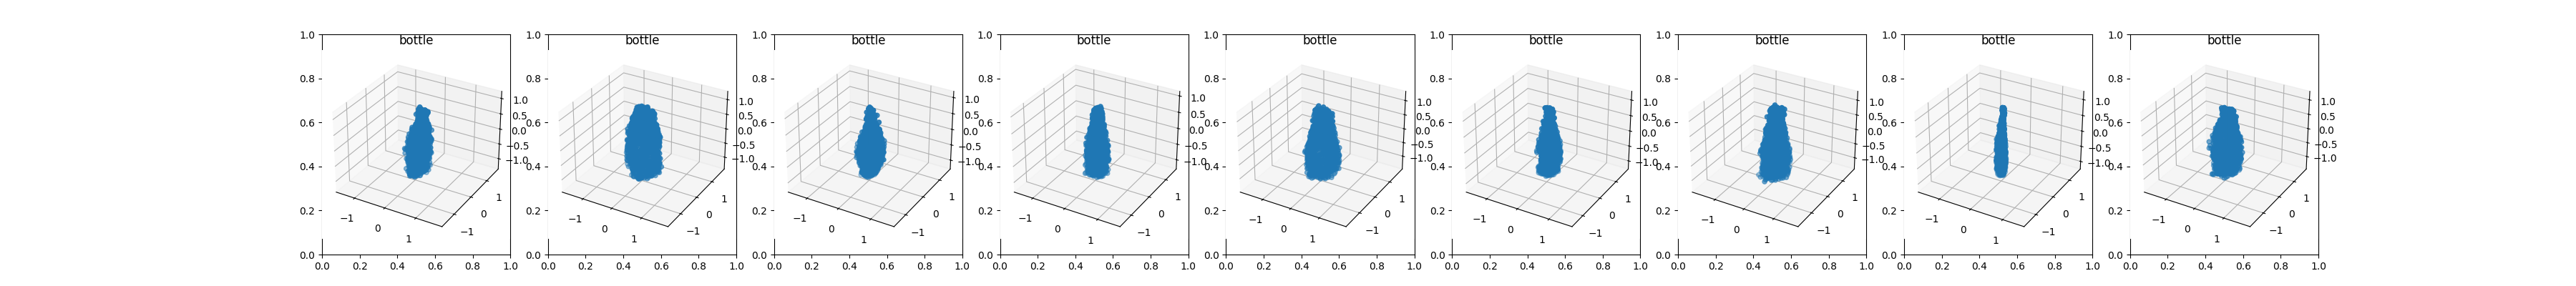

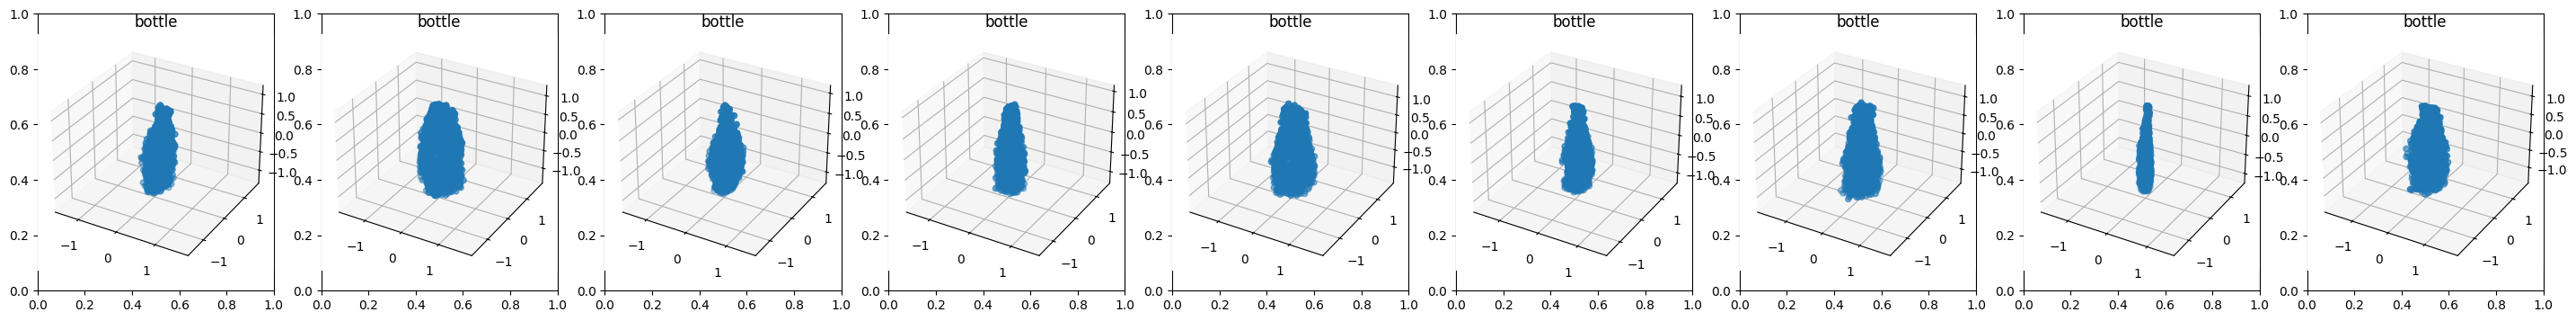

In [15]:
cond = ["bottle"] * 9
samples = diffusion.sample_loop(9, cond, num_inference_steps=20, guidance_scale=2.0, use_cfg=True, clip_denoised=False)
plot_point_clouds(samples, 1, 9, titles=cond)